# ANN in PyTorch

PyTorch is a deep learning framework that provides flexibility, ease of use, and efficiency. Here’s why it’s preferred:

- Easy to Use – Its syntax is Pythonic, making it simple for beginners.
- Dynamic Computation Graphs – Unlike TensorFlow (which uses static graphs), PyTorch allows dynamic graphs, meaning we can change model architecture on the fly.
- GPU Acceleration – Runs efficiently on GPUs, making training faster.
- Strong Community Support – Used in research, academia, and industry (companies like Meta, Tesla, and OpenAI).
- Supports Deep Learning & AI – Ideal for computer vision, natural language processing (NLP), and reinforcement learning.

### Real-World Use Cases of PyTorch

**Predicting House Prices (Regression)**
- Industry: Real Estate
-  Use Case: Predict housing prices based on features like the number of rooms, location, crime rate, etc.
-  Example: The Boston Housing Dataset (as we implemented).
-  Business Value: Helps real estate agencies and buyers in property valuation.

**Image Classification (Computer Vision)**
- Industry: Healthcare, Automotive, Security
- Use Case: Identify objects in images using Convolutional Neural Networks (CNNs).
- **Example:**

- Detecting diseases from X-rays/MRI scans.

- Autonomous cars recognizing pedestrians.

- **Face recognition for security.**
- Business Value: Improves automation & accuracy in medical diagnostics, self-driving cars, and surveillance.
- PyTorch is used by Tesla, Apple, and Google for self-driving AI.


**Natural Language Processing (NLP)**
- Industry: Chatbots, Search Engines, Sentiment Analysis
- Use Case: Train AI to understand human language.
- **Example:**

- Chatbots like ChatGPT use PyTorch.

- Google Search predicting your queries.

- Analyzing customer reviews to determine sentiment (positive/negative).
- Business Value: Improves customer support, marketing, and automation.
- Companies like OpenAI (ChatGPT), Meta (Llama), and Hugging Face use PyTorch.

**Fraud Detection (Finance & Banking)**
- Industry: Finance, Banking, Cybersecurity
- Use Case: Detect fraudulent transactions using deep learning models.
- **Example:**

- Credit card fraud detection.

- Detecting unusual trading patterns in stock markets.
- Business Value: Saves millions by preventing fraud.
- Banks like JPMorgan Chase and PayPal use PyTorch for fraud detection.

**Recommendation Systems (E-Commerce & Streaming)**
- Industry: E-Commerce, OTT Platforms
- Use Case: Personalized recommendations based on user behavior.
- Example:

- Netflix recommending movies based on your past watch history.

- Amazon suggesting products similar to what you browsed.
- Business Value: Increases revenue by enhancing user experience.
- Netflix, Spotify, and Amazon use PyTorch for personalized recommendations.

### How PyTorch is Used in Our Problem (House Price Prediction)?

- We used PyTorch to predict house prices using features like number of rooms, crime rate, etc.
- Built a neural network model with input → hidden → output layers.
- Used ReLU activation function for better learning.
- Optimized model using Adam optimizer to reduce errors.
- Compared predicted vs actual prices to check performance.

- PyTorch is used in AI & ML for various applications like real estate, healthcare, finance, and security.
- Why PyTorch? – It’s flexible, easy to use, and powerful for deep learning.
- Use Cases? – It’s used in image recognition, NLP, fraud detection, recommendation systems, and more!

**Problem Statement**
We will predict house prices 🏠 based on input features like:
- Crime rate (CRIM)
- Number of rooms (RM)
- Age of house (AGE)
- Distance to employment centers (DIS)
- Tax (TAX)
- And more…

📌 Use Case: This can help real estate agencies, property investors, or homebuyers to estimate house prices.

In [49]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

### Load the Dataset

We use California Housing Prices Dataset, which contains housing details like population, median income, and more. The goal is to predict house prices based on these features.

In [56]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Features
y = pd.DataFrame(data.target, columns=["Price"])  # Target (house price)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data (scaling improves training performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


### Define the Neural Network Model

Now, we define a simple feedforward neural network in PyTorch.

In [61]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)  # First layer (Input → 64 neurons)
        self.relu = nn.ReLU()                 # Activation function
        self.fc2 = nn.Linear(64, 32)          # Second layer (64 → 32 neurons)
        self.fc3 = nn.Linear(32, 1)           # Output layer (32 → 1 neuron)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)  # No activation function at the last layer
        return x

# Initialize the model
model = NeuralNetwork(input_size=X_train.shape[1])


 What We Did Here
- ✔ Created a NeuralNetwork class inheriting from nn.Module
- ✔ Defined three layers:

- Input Layer: input_size → 64 neurons

- Hidden Layer: 64 → 32 neurons

- Output Layer: 32 → 1 neuron (predicts house price)
- ✔ Used ReLU (Rectified Linear Unit) Activation Function to add non-linearity


### Train the Model

Now, we define a loss function and an optimizer, then train the model.

In [73]:
# Define loss function (Mean Squared Error) and optimizer (Adam)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Reset gradients
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Calculate loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

print("Training Complete!")


Epoch [100/1000], Loss: 0.3594
Epoch [200/1000], Loss: 0.3060
Epoch [300/1000], Loss: 0.2761
Epoch [400/1000], Loss: 0.2610
Epoch [500/1000], Loss: 0.2533
Epoch [600/1000], Loss: 0.2466
Epoch [700/1000], Loss: 0.2420
Epoch [800/1000], Loss: 0.2467
Epoch [900/1000], Loss: 0.2295
Epoch [1000/1000], Loss: 0.2241
Training Complete!


**What We Did Here**
- ✔ Used Mean Squared Error (MSE) as the loss function (since it's a regression problem).
- ✔ Used Adam Optimizer, which adjusts learning rate dynamically for better performance.
- ✔ Ran the training loop for 1000 epochs:

- Forward Pass: Compute predictions.

- Loss Calculation: Compare predictions to actual house prices.

- Backward Pass: Compute gradients for weight updates.

- Optimizer Step: Update weights using gradient descent.
- ✔ Printed loss every 100 epochs to monitor training.

### Evaluate the Model

After training, let's test the model with unseen data.

In [83]:
# Switch to evaluation mode
model.eval()
predictions = model(X_test_tensor).detach().numpy()

# Convert to DataFrame for better visualization
results = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': predictions.flatten()})
print(results.head())


    Actual  Predicted
0  0.47700   0.582440
1  0.45800   0.930923
2  5.00001   5.166570
3  2.18600   2.629075
4  2.78000   2.682619


**What We Did Here**
- ✔ Switched model to evaluation mode using .eval().
- ✔ Predicted house prices on test data.
- ✔ Converted predictions to DataFrame for easy comparison.

### Visualize Results

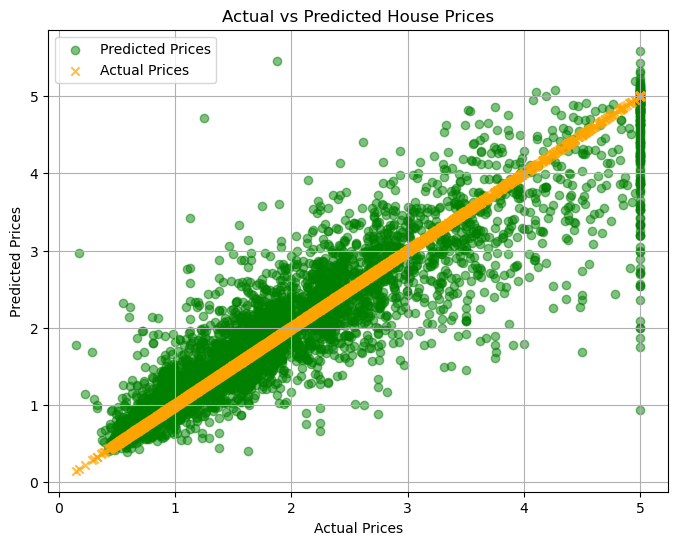

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot actual vs predicted values with distinct colors
plt.scatter(y_test.values, predictions, c='green', label="Predicted Prices", alpha=0.5)
plt.scatter(y_test.values, y_test.values, c='orange', label="Actual Prices", alpha=0.7, marker='x')

# Labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()  # Add legend to distinguish actual and predicted values
plt.grid(True)
plt.show()


- ✅ Green dots → Represent Predicted Prices
- ✅ Orange X markers → Represent Actual Prices
- ✅ More visibility → Increased opacity for actual prices (alpha=0.7)
- ✅ Better contrast → Helps analyze where predictions deviate

- What We Did Here
- ✔ Plotted scatter plot to compare actual vs predicted prices.
- ✔ If the model is good, points will be closer to a straight line.

### Save and Load the Model

Once trained, we can save the model for future use.

In [153]:
# Save model
torch.save(model.state_dict(), "house_price_model.pth")

# Load model
loaded_model = NeuralNetwork(input_size=X_train.shape[1])
loaded_model.load_state_dict(torch.load("house_price_model.pth"))
loaded_model.eval()  # Switch to evaluation mode

NeuralNetwork(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
)

- What We Did Here
- ✔ Saved the model using torch.save().
- ✔ Reloaded the model using torch.load().
-  ✔ Set it to evaluation mode before making predictions.

### Deploy the Model

Now, the trained model can be used to predict new house prices.

In [158]:
new_house = [[8.3252, 41.0, 6.9841, 1.0238, 322.0, 2.5556, 37.88, -122.23]]  # Example data
new_house_scaled = scaler.transform(new_house)  # Standardize input
new_house_tensor = torch.tensor(new_house_scaled, dtype=torch.float32)

# Predict price
predicted_price = model(new_house_tensor).item()
print(f"Predicted Price: ${predicted_price * 100000:.2f}")


Predicted Price: $425083.64


C:\Users\DELL 4\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**What We Did Here**
- ✔ Used new data for prediction.
- ✔ Standardized new data using scaler.transform().
- ✔ Converted it into tensor format for PyTorch.
- ✔ Model predicted house price, which we scaled back for real-world value.

### Summary of What We Did

- 1️⃣ Loaded the California Housing dataset 📊
- 2️⃣ Preprocessed & split the data 📂
- 3️⃣ Defined a neural network in PyTorch 🧠
- 4️⃣ Trained the model using MSE loss & Adam optimizer 🎯
- 5️⃣ Evaluated model performance 📈
- 6️⃣ Visualized Actual vs Predicted prices 📊
- 7️⃣ Saved & reloaded the model for future use 🔄
- 8️⃣ Used model to predict house prices 🏡

### Why Use PyTorch?

- Flexibility: More control over model structure than TensorFlow.
- ✔ Dynamic Computation Graph: Supports real-time model modifications.
- ✔ Easy Debugging: Works like Python, making it intuitive.
-  ✔ Great for Research & Deep Learning: Used in cutting-edge AI applications.


### Next Steps

- Improve accuracy by tuning hyperparameters (hidden layers, learning rate).
- Add dropout layers to prevent overfitting.
- Use a real estate dataset with more features.